In [1]:
!pip install ultralytics opencv-python-headless tqdm


✅ Total Detections: 19


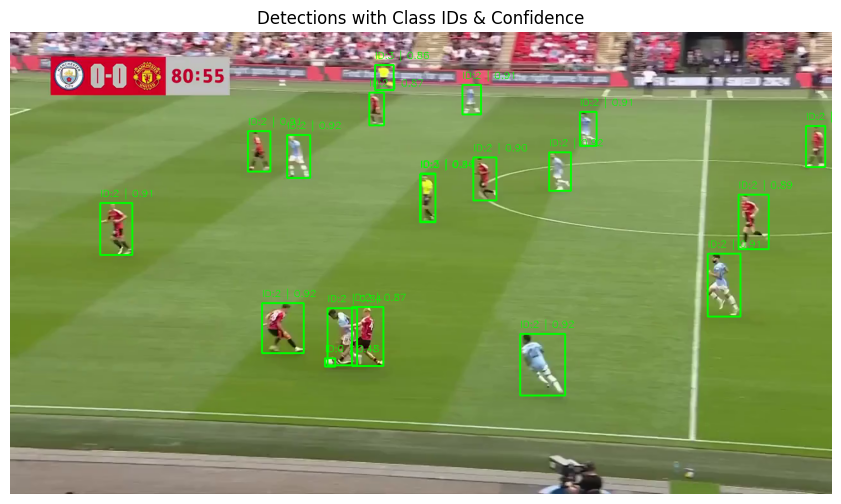

In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load model
model = YOLO("best.pt")

# Load one frame from video
cap = cv2.VideoCapture("15sec_input_720p.mp4")
ret, frame = cap.read()
cap.release()

if not ret:
    print("Could not read video frame.")
else:
    # Run detection
    results = model.predict(source=frame, conf=0.3, save=False, verbose=False)
    boxes = results[0].boxes

    print(f"Total Detections: {len(boxes)}")

    # Draw all detected boxes with labels
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls[0].item())
        conf = float(box.conf[0].item())
        
        label = f"ID:{cls} | {conf:.2f}"
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

    # Show frame with bounding boxes
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Detections with Class IDs & Confidence")
    plt.show()


In [8]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")
model.track(source="15sec_input_720p.mp4", tracker="bytetrack.yaml", save=True, conf=0.25)




    WARNING  stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/375) C:\Users\shreya singh\player reID\15sec_input_720p.mp4: 384x640 15 persons, 590.8ms
video 1/1 (2/375) C:\Users\shreya singh\player reID\15sec_input_720p.mp4: 384x640 14 persons, 568.4ms
video 1/1 (3/375) C:\Users\shreya singh\player reID\15sec_input_720p.mp4: 384x640 14 persons, 584.7ms
video 1/1 (4/375) C:\Users\shreya singh\player reID\15sec_input_720p.mp4: 384x640 14 persons, 1 sports ball, 579.2ms
video 1/1 (5/375) C:\Users\shreya sing

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couc

In [10]:
import os

for root, dirs, files in os.walk("runs/track"):
    for name in files:
        if name.endswith(".mp4"):
            print("Video found at:", os.path.join(root, name))

            